<a href="https://colab.research.google.com/github/open-mmlab/mmpose/blob/main/demo/MMPose_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMPose Tutorial

Welcome to MMPose colab tutorial! In this tutorial, we will show you how to

- install MMPose 1.x
- perform inference with an MMPose model
- train a new mmpose model with your own datasets

Let's start!

## Install MMPose

We recommend to use a conda environment to install mmpose and its dependencies. And compilers `nvcc` and `gcc` are required.

In [ ]:
# check NVCC version
!nvcc -V

# check GCC version
!gcc --version

# check python in conda environment
!which python

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/usr/local/bin/python


In [ ]:
# install dependencies: (if your colab has CUDA 11.8)
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''
# install dependencies: (use cu111 if colab has CUDA 11.1)
%pip install torch==1.10.0+cu111 torchvision==0.11.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
'''

In [ ]:
# install MMEngine, MMCV and MMDetection using MIM
%pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0rc1"
!mim install "mmdet>=3.0.0rc0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 KB 3.2 MB/s eta 0:00:00
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.9/366.9 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 16.2 MB/s eta 0:00:00
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.p

In [ ]:
# for better Colab compatibility, install xtcocotools from source
%pip install git+https://github.com/jin-s13/xtcocoapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-req-build-u4ngd9kd
  Running command git clone --filter=blob:none --quiet https://github.com/jin-s13/xtcocoapi /tmp/pip-req-build-u4ngd9kd
  Resolved https://github.com/jin-s13/xtcocoapi to commit 86a60cab276e619dac5d22834a36dceaf7aa0a38
  Preparing metadata (setup.py) ... done
  Created wheel for xtcocotools: filename=xtcocotools-1.13-cp39-cp39-linux_x86_64.whl size=402075 sha256=fa16b6b7f811ae7184a6f15bf0d0f02ea51588f0fdc7b20a4ed7f36a94efadfc
  Stored in directory: /tmp/pip-ephem-wheel-cache-fxlhymny/wheels/3f/df/8b/d3eff2ded4b03a665d977a0baa328d9efa2f9ac9971929a222
Successfully built xtcocotools


In [ ]:
!git clone https://github.com/open-mmlab/mmpose.git
# The master branch is version 1.x 
%cd mmpose
%pip install -r requirements.txt
%pip install -v -e .
# "-v" means verbose, or more output
# "-e" means installing a project in editable mode,
# thus any local modifications made to the code will take effect without reinstallation.

Cloning into 'mmpose'...
remote: Enumerating objects: 26058, done.
remote: Counting objects: 100% (778/778), done.
remote: Compressing objects: 100% (499/499), done.
remote: Total 26058 (delta 403), reused 532 (delta 267), pack-reused 25280
Receiving objects: 100% (26058/26058), 28.50 MiB | 26.39 MiB/s, done.
Resolving deltas: 100% (18458/18458), done.
/content/mmpose
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 KB 9.9 MB/s eta 0:00:00
     ━━

In [ ]:
# Check Pytorch installation
import torch, torchvision

print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose

print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 2.0.0+cu118 True
torchvision version: 0.15.1+cu118
mmpose version: 1.0.0
cuda version: 11.8
compiler information: GCC 9.3


## Inference with an MMPose model

MMPose provides high-level APIs for model inference and training.

In [ ]:
import mmcv
from mmcv import imread
import mmengine
from mmengine.registry import init_default_scope
import numpy as np

from mmpose.apis import inference_topdown
from mmpose.apis import init_model as init_pose_estimator
from mmpose.evaluation.functional import nms
from mmpose.registry import VISUALIZERS
from mmpose.structures import merge_data_samples

try:
    from mmdet.apis import inference_detector, init_detector
    has_mmdet = True
except (ImportError, ModuleNotFoundError):
    has_mmdet = False

local_runtime = False

try:
    from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
    local_runtime = True

img = 'tests/data/coco/000000197388.jpg'
pose_config = 'configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w32_8xb64-210e_coco-256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

device = 'cuda:0'
cfg_options = dict(model=dict(test_cfg=dict(output_heatmaps=True)))


# build detector
detector = init_detector(
    det_config,
    det_checkpoint,
    device=device
)


# build pose estimator
pose_estimator = init_pose_estimator(
    pose_config,
    pose_checkpoint,
    device=device,
    cfg_options=cfg_options
)

# init visualizer
pose_estimator.cfg.visualizer.radius = 3
pose_estimator.cfg.visualizer.line_width = 1
visualizer = VISUALIZERS.build(pose_estimator.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_pose_estimator
visualizer.set_dataset_meta(pose_estimator.dataset_meta)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth" to /root/.cache/torch/hub/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth


Downloading: "https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w32_coco_256x192-c78dce93_20200708.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32_coco_256x192-c78dce93_20200708.pth


04/06 12:25:19 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


In [ ]:

def visualize_img(img_path, detector, pose_estimator, visualizer,
                  show_interval, out_file):
    """Visualize predicted keypoints (and heatmaps) of one image."""

    # predict bbox
    init_default_scope(detector.cfg.get('default_scope', 'mmdet'))
    detect_result = inference_detector(detector, img_path)
    pred_instance = detect_result.pred_instances.cpu().numpy()
    bboxes = np.concatenate(
        (pred_instance.bboxes, pred_instance.scores[:, None]), axis=1)
    bboxes = bboxes[np.logical_and(pred_instance.labels == 0,
                                   pred_instance.scores > 0.3)]
    bboxes = bboxes[nms(bboxes, 0.3)][:, :4]

    # predict keypoints
    pose_results = inference_topdown(pose_estimator, img_path, bboxes)
    data_samples = merge_data_samples(pose_results)

    # show the results
    img = mmcv.imread(img_path)
    img = mmcv.imconvert(img, 'bgr', 'rgb')

    visualizer.add_datasample(
        'result',
        img,
        data_sample=data_samples,
        draw_gt=False,
        draw_heatmap=True,
        draw_bbox=True,
        show=False,
        wait_time=show_interval,
        out_file=out_file,
        kpt_thr=0.3)

In [ ]:
visualize_img(
    img,
    detector,
    pose_estimator,
    visualizer,
    show_interval=0,
    out_file=None)

vis_result = visualizer.get_image()

/usr/local/lib/python3.9/dist-packages/mmengine/visualization/visualizer.py:664: UserWarning: Warning: The circle is out of bounds, the drawn circle may not be in the image
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mmengine/visualization/visualizer.py:741: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mmengine/visualization/visualizer.py:812: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


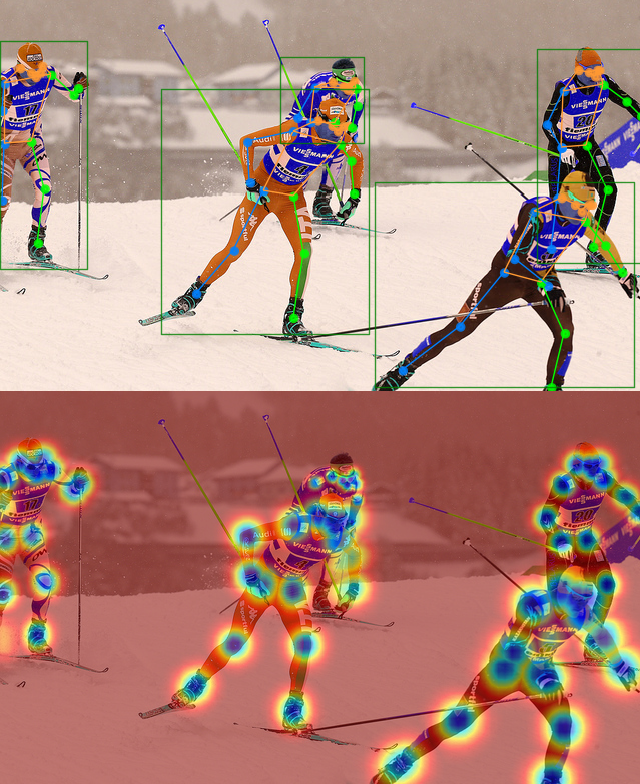

In [ ]:
if local_runtime:
    from IPython.display import Image, display
    import tempfile
    import os.path as osp
    import cv2
    with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join(tmpdir, 'pose_results.png')
        cv2.imwrite(file_name, vis_result[:,:,::-1])
        display(Image(file_name))
else:
    cv2_imshow(vis_result)

### Add a new dataset

There are two methods to support a customized dataset in MMPose. The first one is to convert the data to a supported format (e.g. COCO) and use the corresponding dataset class (e.g. BaseCocoStyleDataset), as described in the [document](https://mmpose.readthedocs.io/en/1.x/user_guides/prepare_datasets.html). The second one is to add a new dataset class. In this tutorial, we give an example of the second method.

We first download the demo dataset, which contains 100 samples (75 for training and 25 for validation) selected from COCO train2017 dataset. The annotations are stored in a different format from the original COCO format.


In [ ]:
# download dataset
%mkdir data
%cd data
!wget https://download.openmmlab.com/mmpose/datasets/coco_tiny.tar
!tar -xf coco_tiny.tar
%cd ..

/content/mmpose/data
--2022-09-14 10:39:37--  https://download.openmmlab.com/mmpose/datasets/coco_tiny.tar
Resolving download.openmmlab.com (download.openmmlab.com)... 47.89.140.71
Connecting to download.openmmlab.com (download.openmmlab.com)|47.89.140.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16558080 (16M) [application/x-tar]
Saving to: ‘coco_tiny.tar’

coco_tiny.tar       100%[===================>]  15.79M  9.14MB/s    in 1.7s    

2022-09-14 10:39:40 (9.14 MB/s) - ‘coco_tiny.tar’ saved [16558080/16558080]

/content/mmpose


In [ ]:
# check the directory structure
!apt-get -q install tree
!tree data/coco_tiny

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (161 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
data/coco_tiny
├── images
│   ├── 000000012754.jpg
│   ├── 000000017741.jpg
│   ├── 000000019157.jpg
│   ├── 000000019523.jpg
│   ├── 000000019608.jpg
│   ├── 

In [ ]:
# check the annotation format
import json
import pprint

anns = json.load(open('data/coco_tiny/train.json'))

print(type(anns), len(anns))
pprint.pprint(anns[0], compact=True)

<class 'list'> 75
{'bbox': [267.03, 104.32, 229.19, 320],
 'image_file': '000000537548.jpg',
 'image_size': [640, 480],
 'keypoints': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 325, 160, 2, 398,
               177, 2, 0, 0, 0, 437, 238, 2, 0, 0, 0, 477, 270, 2, 287, 255, 1,
               339, 267, 2, 0, 0, 0, 423, 314, 2, 0, 0, 0, 355, 367, 2]}


After downloading the data, we implement a new dataset class to load data samples for model training and validation. Assume that we are going to train a top-down pose estimation model, the new dataset class inherits `BaseCocoStyleDataset`.

We have already implemented a `CocoDataset` so that we can take it as an example.

#### Note
If you meet the following error:
```shell
AssertionError: class `PoseLocalVisualizer` in mmpose/visualization/local_visualizer.py: <class 'mmpose.visualization.local_visualizer.PoseLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not access any other arguments
```
Please reboot your jupyter kernel and start running from here.

In [ ]:
%cd mmpose

In [ ]:
# Copyright (c) OpenMMLab. All rights reserved.
import json
import os.path as osp
from typing import Callable, List, Optional, Sequence, Union

import numpy as np
from mmengine.utils import check_file_exist

from mmpose.registry import DATASETS
from mmpose.datasets.datasets.base import BaseCocoStyleDataset


@DATASETS.register_module()
class TinyCocoDataset(BaseCocoStyleDataset):
    METAINFO: dict = dict(from_file='configs/_base_/datasets/coco.py')

    def _load_annotations(self) -> List[dict]:
        """Load data from annotations in MPII format."""

        check_file_exist(self.ann_file)
        with open(self.ann_file) as anno_file:
            anns = json.load(anno_file)

        data_list = []
        ann_id = 0

        for idx, ann in enumerate(anns):
            img_h, img_w = ann['image_size']

            # get bbox in shape [1, 4], formatted as xywh
            x, y, w, h = ann['bbox']
            x1 = np.clip(x, 0, img_w - 1)
            y1 = np.clip(y, 0, img_h - 1)
            x2 = np.clip(x + w, 0, img_w - 1)
            y2 = np.clip(y + h, 0, img_h - 1)

            bbox = np.array([x1, y1, x2, y2], dtype=np.float32).reshape(1, 4)

            # load keypoints in shape [1, K, 2] and keypoints_visible in [1, K]
            joints_3d = np.array(ann['keypoints']).reshape(1, -1, 3)
            num_joints = joints_3d.shape[1]
            keypoints = np.zeros((1, num_joints, 2), dtype=np.float32)
            keypoints[:, :, :2] = joints_3d[:, :, :2]
            keypoints_visible = np.minimum(1, joints_3d[:, :, 2:3])
            keypoints_visible = keypoints_visible.reshape(1, -1)

            data_info = {
                'id': ann_id,
                'img_id': int(ann['image_file'].split('.')[0]),
                'img_path': osp.join(self.data_prefix['img'], ann['image_file']),
                'bbox': bbox,
                'bbox_score': np.ones(1, dtype=np.float32),
                'keypoints': keypoints,
                'keypoints_visible': keypoints_visible,
            }

            data_list.append(data_info)
            ann_id = ann_id + 1

        return data_list


### Create a config file

In the next step, we create a config file which configures the model, dataset and runtime settings. More information can be found at [Configs](https://mmpose.readthedocs.io/en/1.x/user_guides/configs.html). A common practice to create a config file is deriving from a existing one. In this tutorial, we load a config file that trains a HRNet on COCO dataset, and modify it to adapt to the COCOTiny dataset.

In [ ]:
from mmengine import Config

cfg = Config.fromfile(
    './configs/body_2d_keypoint/topdown_heatmap/coco/td-hm_hrnet-w32_8xb64-210e_coco-256x192.py'
)

# set basic configs
cfg.data_root = 'data/coco_tiny'
cfg.work_dir = 'work_dirs/hrnet_w32_coco_tiny_256x192'
cfg.randomness = dict(seed=0)

# set log interval
cfg.train_cfg.val_interval = 1

# set num of epoch
cfg.train_cfg.max_epochs = 40

# set optimizer
cfg.optim_wrapper = dict(optimizer=dict(
    type='Adam',
    lr=5e-4,
))

# set learning rate policy
cfg.param_scheduler = [
    dict(
        type='LinearLR', begin=0, end=10, start_factor=0.001,
        by_epoch=False),  # warm-up
    dict(
        type='MultiStepLR',
        begin=0,
        end=cfg.train_cfg.max_epochs,
        milestones=[17, 35],
        gamma=0.1,
        by_epoch=True)
]


# set batch size
cfg.train_dataloader.batch_size = 16
cfg.val_dataloader.batch_size = 16
cfg.test_dataloader.batch_size = 16

# set dataset configs
cfg.dataset_type = 'TinyCocoDataset'
cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.ann_file = 'train.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img='images/')


cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.bbox_file = None
cfg.val_dataloader.dataset.ann_file = 'val.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img='images/')

cfg.test_dataloader.dataset.type = cfg.dataset_type
cfg.test_dataloader.dataset.bbox_file = None
cfg.test_dataloader.dataset.ann_file = 'val.json'
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix = dict(img='images/')

# set evaluator
cfg.val_evaluator = dict(type='PCKAccuracy')
cfg.test_evaluator = cfg.val_evaluator

cfg.default_hooks.checkpoint.save_best = 'pck/PCK@0.05'
cfg.default_hooks.checkpoint.max_keep_ckpts = 1

print(cfg.pretty_text)


default_scope = 'mmpose'
default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=50),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(
        type='CheckpointHook',
        interval=1,
        save_best='pck/PCK@0.05',
        rule='greater',
        max_keep_ckpts=1),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    visualization=dict(type='PoseVisualizationHook', enable=False))
custom_hooks = [dict(type='SyncBuffersHook')]
env_cfg = dict(
    cudnn_benchmark=False,
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0),
    dist_cfg=dict(backend='nccl'))
vis_backends = [dict(type='LocalVisBackend')]
visualizer = dict(
    type='PoseLocalVisualizer',
    vis_backends=[dict(type='LocalVisBackend')],
    name='visualizer')
log_processor = dict(
    type='LogProcessor', window_size=50, by_epoch=True, num_digits=6)
log_level = 'INFO'
load_from = None
resume = False
file_client_args = dict(backend='disk'

or you can create a config file like follows:
```Python3
_base_ = ['../../../_base_/default_runtime.py']

# runtime
train_cfg = dict(max_epochs=40, val_interval=1)

# optimizer
optim_wrapper = dict(optimizer=dict(
    type='Adam',
    lr=5e-4,
))

# learning policy
param_scheduler = [
    dict(
        type='LinearLR', begin=0, end=500, start_factor=0.001,
        by_epoch=False),  # warm-up
    dict(
        type='MultiStepLR',
        begin=0,
        end=train_cfg.max_epochs,
        milestones=[17, 35],
        gamma=0.1,
        by_epoch=True)
]

# automatically scaling LR based on the actual training batch size
auto_scale_lr = dict(base_batch_size=512)

# codec settings
codec = dict(
    type='MSRAHeatmap', input_size=(192, 256), heatmap_size=(48, 64), sigma=2)

# model settings
model = dict(
    type='TopdownPoseEstimator',
    data_preprocessor=dict(
        type='PoseDataPreprocessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True),
    backbone=dict(
        type='HRNet',
        in_channels=3,
        extra=dict(
            stage1=dict(
                num_modules=1,
                num_branches=1,
                block='BOTTLENECK',
                num_blocks=(4, ),
                num_channels=(64, )),
            stage2=dict(
                num_modules=1,
                num_branches=2,
                block='BASIC',
                num_blocks=(4, 4),
                num_channels=(32, 64)),
            stage3=dict(
                num_modules=4,
                num_branches=3,
                block='BASIC',
                num_blocks=(4, 4, 4),
                num_channels=(32, 64, 128)),
            stage4=dict(
                num_modules=3,
                num_branches=4,
                block='BASIC',
                num_blocks=(4, 4, 4, 4),
                num_channels=(32, 64, 128, 256))),
        init_cfg=dict(
            type='Pretrained',
            checkpoint='https://download.openmmlab.com/mmpose/'
            'pretrain_models/hrnet_w32-36af842e.pth'),
    ),
    head=dict(
        type='HeatmapHead',
        in_channels=32,
        out_channels=17,
        deconv_out_channels=None,
        loss=dict(type='KeypointMSELoss', use_target_weight=True),
        decoder=codec),
    test_cfg=dict(
        flip_test=True,
        flip_mode='heatmap',
        shift_heatmap=True,
    ))

# base dataset settings
dataset_type = 'TinyCocoDataset'
data_mode = 'topdown'
data_root = 'data/coco_tiny'
work_dir = 'work_dirs/hrnet_w32_coco_tiny_256x192'
randomness = dict(seed=0)

# pipelines
train_pipeline = [
    dict(type='LoadImage'),
    dict(type='GetBBoxCenterScale'),
    dict(type='RandomFlip', direction='horizontal'),
    dict(type='RandomHalfBody'),
    dict(type='RandomBBoxTransform'),
    dict(type='TopdownAffine', input_size=codec['input_size']),
    dict(type='GenerateTarget', target_type='heatmap', encoder=codec),
    dict(type='PackPoseInputs')
]
test_pipeline = [
    dict(type='LoadImage'),
    dict(type='GetBBoxCenterScale'),
    dict(type='TopdownAffine', input_size=codec['input_size']),
    dict(type='PackPoseInputs')
]

# data loaders
train_dataloader = dict(
    batch_size=16,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_mode=data_mode,
        ann_file='train.json',
        data_prefix=dict(img='images/'),
        pipeline=train_pipeline,
    ))
val_dataloader = dict(
    batch_size=16,
    num_workers=2,
    persistent_workers=True,
    drop_last=False,
    sampler=dict(type='DefaultSampler', shuffle=False, round_up=False),
    dataset=dict(
        type=dataset_type,
        data_root=data_root,
        data_mode=data_mode,
        ann_file='val.json',
        data_prefix=dict(img='images/'),
        test_mode=True,
        pipeline=test_pipeline,
    ))
test_dataloader = val_dataloader

# evaluators
val_evaluator = dict(
    type='PCKAccuracy')
test_evaluator = val_evaluator

# hooks
default_hooks = dict(checkpoint=dict(save_best='coco/AP', rule='greater'))
```

### Train and Evaluation


In [ ]:
from mmengine.config import Config, DictAction
from mmengine.runner import Runner

# set preprocess configs to model
cfg.model.setdefault('data_preprocessor', cfg.get('preprocess_cfg', {}))

# build the runner from config
runner = Runner.from_cfg(cfg)

# start training
runner.train()

09/15 12:42:06 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
09/15 12:42:06 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.13 (default, Mar 29 2022, 02:18:16) [GCC 7.5.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce GTX 1660 Ti
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.3, V11.3.109
    GCC: gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609
    PyTorch: 1.12.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 2019112

TopdownPoseEstimator(
  (data_preprocessor): PoseDataPreprocessor()
  (backbone): HRNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm

#### Note
The recommended best practice is to convert your customized data into COCO format.